In [1]:
%matplotlib inline


# Linear Regression

In this notebook, we are going to utilize the data available from Indian Census for 2011 and applying simple linear regression to explore possibility of data analysis.

The following operations are preformed on the data
- Import into Pandas Dataframe
- Explore the data using describe operation
- Subset & Filter data as per the analysis requirement
- Generate Training & Test dataset for the regression model
- Fit the regression model with the training data
- Evaluate the performace of the test data
- Perform predictions from the trained models
- Critique the performance of the model & nature of the results


Data Source
http://www.censusindia.gov.in/datagov/F-01/2011-F01-0000-Rev4-MDDS.xls)


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from random import randint

# Loading the Data

Let us load the raw data from the csv and try to make sense of it

In [3]:
data = pd.read_csv("../data/India-Women-Stats-Population-2011.csv");
data.describe(include = "all")

,Table Name,State Code,District Code,Area Name,Area,Present Age,Total Women,Total Ever Married Women,Total Ever Married Women - Parity - 0,Total Ever Married Women - Parity - 1,Total Ever Married Women - Parity - 2,Total Ever Married Women - Parity - 3,Total Ever Married Women - Parity - 4,Total Ever Married Women - Parity - 5,Total Ever Married Women - Parity - 6,Total Ever Married Women - Parity - 7+,Total Children Ever Born - Persons,Total Children Ever Born - Male,Total Children Ever Born - Female
count,1728,1728.000000,1728.0,1728,1728,1728,1.728000e+03,1.728000e+03,1.728000e+03,1.728000e+03,1.728000e+03,1.728000e+03,1.728000e+03,1.728000e+03,1.728000e+03,1.728000e+03,1.728000e+03,1.728000e+03,1.728000e+03
unique,36,NaN,NaN,36,3,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,F0135,NaN,NaN,State - RAJASTHAN,Urban,35-39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,48,NaN,NaN,48,576,108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,17.500000,0.0,NaN,NaN,NaN,2.715399e+06,1.569613e+06,2.288006e+05,2.354038e+05,3.766557e+05,2.793227e+05,1.853889e+05,1.097539e+05,6.698673e+04,8.730042e+04,4.230052e+06,2.237510e+06,1.992542e+06
std,NaN,10.391302,0.0,NaN,NaN,NaN,1.945784e+07,1.096615e+07,1.625599e+06,1.661111e+06,2.637555e+06,1.974181e+06,1.325842e+06,7.956159e+05,4.900404e+05,6.426793e+05,2.991225e+07,1.581740e+07,1.409542e+07
min,NaN,0.000000,0.0,NaN,NaN,NaN,3.200000e+01,1.000000e+01,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00
25%,NaN,8.750000,0.0,NaN,NaN,NaN,2.051750e+04,1.207900e+04,1.578750e+03,1.384500e+03,1.986750e+03,1.066750e+03,7.687500e+02,2.777500e+02,1.607500e+02,2.200000e+02,2.728475e+04,1.395900e+04,1.320575e+04
50%,NaN,17.500000,0.0,NaN,NaN,NaN,1.947355e+05,1.138560e+05,1.356950e+04,1.194950e+04,1.631650e+04,1.223350e+04,9.793000e+03,5.540000e+03,3.139500e+03,4.054000e+03,2.779840e+05,1.455710e+05,1.316830e+05
75%,NaN,26.250000,0.0,NaN,NaN,NaN,1.036527e+06,6.819938e+05,7.791475e+04,8.008900e+04,1.331822e+05,1.103212e+05,7.201475e+04,3.856625e+04,2.364425e+04,2.904600e+04,1.829475e+06,9.727488e+05,8.631092e+05


In [4]:
areas = pd.DataFrame(data['Area Name'].unique())
areas.columns = ['Area Name']
print("Number of Area Names:", len(areas))
areas

Number of Area Names: 36


,Area Name
0,INDIA
1,State - JAMMU & KASHMIR
2,State - HIMACHAL PRADESH
3,State - PUNJAB
4,Union Territory - CHANDIGARH
5,State - UTTARAKHAND
6,State - HARYANA
7,State - NCT OF DELHI
8,State - RAJASTHAN
9,State - UTTAR PRADESH


This looks good, no telengana but well its 2011 data after all.

In [5]:
ages =  pd.DataFrame(data['Present Age'].unique());
ages.columns= ['Age Range']
ages

,Age Range
0,All Ages
1,Less than 15
2,15-19
3,20-24
4,25-29
5,30-34
6,35-39
7,40-44
8,45-49
9,50-54


# What Next

Well there are quite a few things we can do with this data, go on exploring column by column and then coming up with questions we would like to get answers for, however for this exercise I am going to see if i can model a simple linear regression to predict based on age (lets keep it simple for today) on how many children a woman is probably going to have.

# Manipluating Data

Let us create a new column to hold a new metric (TFR) which is the total fertility rate for women, we have the total women and the total children persons column, just need to divide the them to get this value

TFR = (Total Children Ever Born - Persons) / (Total Women) 

But before we do anything on the dataset, lets create a tranformed data set to play around with and not modify the original

In [6]:
df = data[['Area Name', 'Present Age', 'Total Women', 'Total Children Ever Born - Persons']].copy()
df.head()

,Area Name,Present Age,Total Women,Total Children Ever Born - Persons
0,INDIA,All Ages,587584719,915091154
1,INDIA,Less than 15,178092741,777233
2,INDIA,15-19,56544053,5237149
3,INDIA,20-24,53839529,41586014
4,INDIA,25-29,50069757,85628118


Looks like we have a few things we need to filter out of the data to make sure our model is correctly trained, let us remove records for general data like INDIA and All Ages

In [8]:
df = df[df['Area Name'] != 'INDIA'][df['Present Age'] != 'All Ages']
# print head of data
df.head()

,Area Name,Present Age,Total Women,Total Children Ever Born - Persons
49,State - JAMMU & KASHMIR,Less than 15,1985536,5272
50,State - JAMMU & KASHMIR,15-19,597100,27306
51,State - JAMMU & KASHMIR,20-24,557335,241339
52,State - JAMMU & KASHMIR,25-29,501563,686640
53,State - JAMMU & KASHMIR,30-34,431157,1018297


Next we will be adding a new Column TFR

In [10]:
df['TFR'] = df['Total Children Ever Born - Persons'] / df['Total Women']
# Check out 1% data sample
df.sample(frac = 0.01)

,Area Name,Present Age,Total Women,Total Children Ever Born - Persons,TFR
981,State - JHARKHAND,30-34,847978,2424063,2.858639
823,State - MEGHALAYA,40-44,72073,302961,4.203530
822,State - MEGHALAYA,35-39,87386,318102,3.640194
1237,Union Territory - DAMAN & DIU,30-34,6463,11793,1.824694
1180,State - GUJARAT,65-69,383659,1531341,3.991412
396,State - RAJASTHAN,65-69,670905,3144225,4.686543
318,State - HARYANA,75-79,68863,386527,5.612985
375,State - NCT OF DELHI,40-44,494557,1435731,2.903065
1319,State - MAHARASHTRA,40-44,1838649,5273022,2.867879
246,State - UTTARAKHAND,35-39,334666,1055551,3.154043


We have one more little problem to solve before we can apply liner regression to the problem, well when trying to create a function f(x) = y , we do have to ensure that x is actually a numerical value. 

Looking at our x it is kind of a category, why dont we assign a numeric label to each of the category. Well lucky for us we already have the *ages* dataframe assigning an autoindex

In [11]:
age_cat_dict = { 
 'Less than 15' : 1,
    '15-19' : 2,
    '20-24' : 3,
    '25-29' : 4,
    '30-34' : 5,
    '35-39' : 6,
    '40-44' : 7,
    '45-49' : 8,
    '50-54' : 9,
    '55-59' : 10,
    '60-64' : 11,
    '65-69' : 12,
    '70-74' : 13,
    '75-79' : 14,
    '80+' : 15
}

df['Present Age Cat'] = df['Present Age']
df['Present Age Cat'].replace(age_cat_dict, inplace = True)
#df['Present Age Cat'] = ages[ages['Age Range'] == "80+"][0]
df.sample(frac = 0.01)

,Area Name,Present Age,Total Women,Total Children Ever Born - Persons,TFR,Present Age Cat
607,State - ARUNACHAL PRADESH,80+,3143,11121,3.538339,15
300,State - HARYANA,65-69,249169,1122343,4.504344,12
175,State - PUNJAB,80+,138958,611425,4.400071,15
1155,State - GUJARAT,20-24,2734595,1909278,0.698194,3
934,State - WEST BENGAL,35-39,2290624,6008450,2.623063,6
619,State - ARUNACHAL PRADESH,60-64,1350,4629,3.428889,11
330,State - HARYANA,55-59,138185,443364,3.208481,10
696,State - MANIPUR,45-49,49541,174452,3.521366,8
441,State - UTTAR PRADESH,50-54,3015106,12697110,4.211165,9
863,State - MEGHALAYA,80+,2292,9234,4.028796,15


In [12]:
# Getting the feature Data
ages_X = df['Present Age Cat'].values.reshape(-1, 1);

len_X = len(ages_X)
# Split into training & test data (when data is small 80:20 works out)
train_len_X = int(len_X * 0.8);
test_len_X = len_X - train_len_X
print("Length of data set:", len_X)
print("Length of training set: " , train_len_X)
print("Length of test set: " , test_len_X)
ages_X_train = ages_X[:train_len_X]
ages_X_test = ages_X[train_len_X:]

Length of data set: 1575
Length of training set:  1260
Length of test set:  315


In [13]:
tfr_Y = df['TFR'].values
len_Y = len(tfr_Y)
# Split into training & test data (when data is small 80:20 works out)
train_len_Y = int(len_Y * 0.8);
test_len_Y = len_X - train_len_Y
tfr_Y_train = tfr_Y[:train_len_Y]
tfr_Y_test = tfr_Y[train_len_Y:]

In [14]:
# Create linear regression object
reg = linear_model.LinearRegression()
reg.fit(ages_X_train, tfr_Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
# Time to make predictions on the test data (20% of the data set aside)
tfr_Y_pred = reg.predict(ages_X_test)
# The coefficients
print('Feature Coefficients (x1, x2, ... ): \n', reg.coef_)

Feature Coefficients (x1, x2, ... ): 
 [ 0.30992102]


In [16]:
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(tfr_Y_test, tfr_Y_pred))

Mean squared error: 0.50


In [17]:
print('(R^2) Variance score: %.2f' % r2_score(tfr_Y_test, tfr_Y_pred))

(R^2) Variance score: 0.78


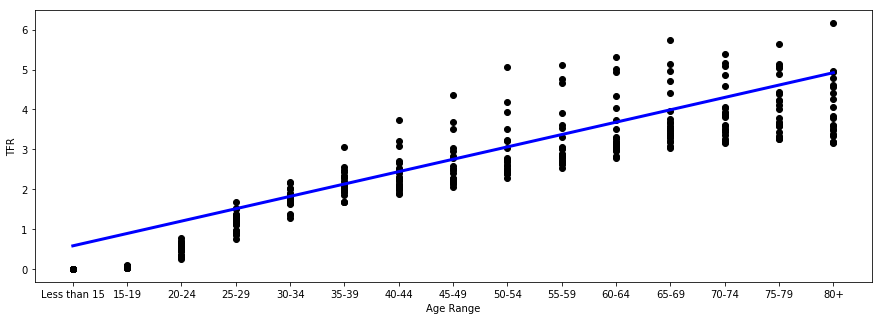

In [18]:
# Plot outputs as a scatter chart
plt.figure(figsize = (15, 5))
plt.scatter(ages_X_test, tfr_Y_test,  color='black')
plt.plot(ages_X_test, tfr_Y_pred, color='blue', linewidth=3)

plt.xlabel('Age Range')
plt.ylabel('TFR')

plt.xticks(range(1, len(age_cat_dict) + 1), list(age_cat_dict.keys()))
plt.yticks((range(7)))

plt.show()

The plot showcases how a generalized linear regression model tries to fit the data into a linear function, however not all is well in here as it can be seen in the graph, for lower age ranges it has quite a high bias and it also starts losing its power to explain the variability of the data in later age ranges.

# Predicting from the Model

After the model is trained and we are content with the evaluation metrics it can be put to use for predicting values 

In [19]:
for age in age_cat_dict.keys():
  age_input = [ [ age_cat_dict[age] ] ];
  pred_children = reg.predict(age_input)[0];
  print("Women in Age (%s) will likely have %.3f children" % (age, pred_children));

Women in Age (Less than 15) will likely have 0.582 children
Women in Age (15-19) will likely have 0.892 children
Women in Age (20-24) will likely have 1.202 children
Women in Age (25-29) will likely have 1.512 children
Women in Age (30-34) will likely have 1.822 children
Women in Age (35-39) will likely have 2.132 children
Women in Age (40-44) will likely have 2.442 children
Women in Age (45-49) will likely have 2.752 children
Women in Age (50-54) will likely have 3.062 children
Women in Age (55-59) will likely have 3.372 children
Women in Age (60-64) will likely have 3.681 children
Women in Age (65-69) will likely have 3.991 children
Women in Age (70-74) will likely have 4.301 children
Women in Age (75-79) will likely have 4.611 children
Women in Age (80+) will likely have 4.921 children


# Conclusion

We were able to create a linear regression model with r^2 score of 0.78, which is quite decent for a single variable regression model to predict the tfr of women by the age range in India.

Looking forward it is obvious that a single variable regression model can be improved upon by factoring additonal variables to make a better *fit* of the training data available.

What can be done to improve the model (few thoughts)

- Factor another variable like State into consideration
- eliminate outliers which are not explained by data but by social constructs (like older generation having more children than the current)
